In [1]:
!pip show gensim

Name: gensim
Version: 3.8.3
Summary: Python framework for fast Vector Space Modelling
Home-page: http://radimrehurek.com/gensim
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPLv2.1
Location: c:\programdata\anaconda3\envs\tf2\lib\site-packages
Requires: scipy, numpy, six, smart-open
Required-by: 


# 安装注意事项

使用gensim 会出现各种问题： 以下原则：
（1）先用pip uninstall +包名命令依次将numpy，scipy，gensim卸载。

（2）再按numpy，scipy，gensim顺序依次安装，能够解决这一问题。

pip install numpy -i https://pypi.douban.com/simple

pip install scipy -i https://pypi.douban.com/simple

pip install gensim -i https://pypi.douban.com/simple

In [2]:
import jieba
res = jieba.cut("今天天气不错")
[word for word in res]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\wangyny\AppData\Local\Temp\jieba.cache
Loading model cost 0.834 seconds.
Prefix dict has been built successfully.


['今天天气', '不错']

In [3]:
from gensim import corpora, models, similarities
from pprint import pprint

def GenDictandCorpus():
    documents = ["今天天气不错",
"挺风和日丽的",
"我们下午没有课",
"这的确挺爽的",
"我一大中午早早的跑去上自习",
"心里琢磨着大学生活是多么美好啊",
"这一眨眼的功夫我就进了主楼",
"要说俺们这嘎瘩自习室其实挺多的",
"可是你桌上没有书包占座那就难找了",
"我是跋山涉水啊",
"翻山越岭啊",
"好不容易来到一个桃源深处",
"我这一推门我考",
"真是豁然开朗",
"这教室就真没多少人"]
    
#     documents = [
#     "Human machine interface for lab abc computer applications",
#     "A survey of user opinion of computer system response time",
#     "The EPS user interface management system",
#     "System and human system engineering testing of EPS",
#     "Relation of user perceived response time to error measurement",
#     "The generation of random binary unordered trees",
#     "The intersection graph of paths in trees",
#     "Graph minors IV Widths of trees and well quasi ordering",
#     "Graph minors A survey",
# ]
#document.lower().split()
    texts = [[word for word in jieba.cut(document)] for document in documents]

    # 词典
    dictionary = corpora.Dictionary(texts)
    # 词库，以(词，词频)方式存贮
    corpus = [dictionary.doc2bow(text) for text in texts]
    print(dictionary)
    print(corpus)
    return dictionary, corpus

GenDictandCorpus()

Dictionary(66 unique tokens: ['不错', '今天天气', '挺', '的', '风和日丽']...)
[[(0, 1), (1, 1)], [(2, 1), (3, 1), (4, 1)], [(5, 1), (6, 1), (7, 1), (8, 1)], [(3, 1), (9, 1), (10, 1), (11, 1)], [(3, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)], [(20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)], [(3, 1), (11, 1), (16, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)], [(2, 1), (3, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1)], [(7, 1), (31, 1), (33, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1)], [(16, 1), (20, 1), (24, 1), (49, 1)], [(20, 1), (50, 1)], [(51, 1), (52, 1), (53, 1), (54, 1), (55, 1)], [(11, 1), (16, 2), (56, 1), (57, 1), (58, 1)], [(59, 1), (60, 1)], [(11, 1), (33, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)]]


(<gensim.corpora.dictionary.Dictionary at 0x1a5e5646460>,
 [[(0, 1), (1, 1)],
  [(2, 1), (3, 1), (4, 1)],
  [(5, 1), (6, 1), (7, 1), (8, 1)],
  [(3, 1), (9, 1), (10, 1), (11, 1)],
  [(3, 1),
   (12, 1),
   (13, 1),
   (14, 1),
   (15, 1),
   (16, 1),
   (17, 1),
   (18, 1),
   (19, 1)],
  [(20, 1),
   (21, 1),
   (22, 1),
   (23, 1),
   (24, 1),
   (25, 1),
   (26, 1),
   (27, 1),
   (28, 1)],
  [(3, 1),
   (11, 1),
   (16, 1),
   (29, 1),
   (30, 1),
   (31, 1),
   (32, 1),
   (33, 1),
   (34, 1)],
  [(2, 1), (3, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1)],
  [(7, 1),
   (31, 1),
   (33, 1),
   (41, 1),
   (42, 1),
   (43, 1),
   (44, 1),
   (45, 1),
   (46, 1),
   (47, 1),
   (48, 1)],
  [(16, 1), (20, 1), (24, 1), (49, 1)],
  [(20, 1), (50, 1)],
  [(51, 1), (52, 1), (53, 1), (54, 1), (55, 1)],
  [(11, 1), (16, 2), (56, 1), (57, 1), (58, 1)],
  [(59, 1), (60, 1)],
  [(11, 1), (33, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)]])

In [4]:
documents = ["今天天气不错",
"挺风和日丽的",
"我们下午没有课",
"这的确挺爽的",
"我一大中午早早的跑去上自习",
"心里琢磨着大学生活是多么美好啊",
"这一眨眼的功夫我就进了主楼",
"要说俺们这嘎瘩自习室其实挺多的",
"可是你桌上没有书包占座那就难找了",
"我是跋山涉水啊",
"翻山越岭啊",
"好不容易来到一个桃源深处",
"我这一推门我考",
"真是豁然开朗",
"这教室就真没多少人"]
    
texts = [[word for word in jieba.cut(document)] for document in documents]
texts

[['今天天气', '不错'],
 ['挺', '风和日丽', '的'],
 ['我们', '下午', '没有', '课'],
 ['这', '的确', '挺爽', '的'],
 ['我', '一大', '中午', '早早', '的', '跑', '去', '上', '自习'],
 ['心里', '琢磨', '着', '大学', '生活', '是', '多么', '美好', '啊'],
 ['这', '一眨眼', '的', '功夫', '我', '就', '进', '了', '主楼'],
 ['要说', '俺们', '这嘎瘩', '自习室', '其实', '挺', '多', '的'],
 ['可是', '你', '桌上', '没有', '书包', '占座', '那', '就', '难', '找', '了'],
 ['我', '是', '跋山涉水', '啊'],
 ['翻山越岭', '啊'],
 ['好不容易', '来到', '一个', '桃源', '深处'],
 ['我', '这', '一', '推门', '我', '考'],
 ['真是', '豁然开朗'],
 ['这', '教室', '就', '真', '没', '多少', '人']]

# 计算 tfidf

In [5]:
from gensim.models.tfidfmodel import TfidfModel
from gensim import corpora
 
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
tf_idf_model = TfidfModel(corpus, normalize=False)
word_tf_tdf = list(tf_idf_model[corpus])
print('词典:', dictionary.token2id)
print('词频:', corpus)
print('词的tf-idf值:', word_tf_tdf)


词典: {'不错': 0, '今天天气': 1, '挺': 2, '的': 3, '风和日丽': 4, '下午': 5, '我们': 6, '没有': 7, '课': 8, '挺爽': 9, '的确': 10, '这': 11, '一大': 12, '上': 13, '中午': 14, '去': 15, '我': 16, '早早': 17, '自习': 18, '跑': 19, '啊': 20, '多么': 21, '大学': 22, '心里': 23, '是': 24, '琢磨': 25, '生活': 26, '着': 27, '美好': 28, '一眨眼': 29, '主楼': 30, '了': 31, '功夫': 32, '就': 33, '进': 34, '俺们': 35, '其实': 36, '多': 37, '自习室': 38, '要说': 39, '这嘎瘩': 40, '书包': 41, '你': 42, '占座': 43, '可是': 44, '找': 45, '桌上': 46, '那': 47, '难': 48, '跋山涉水': 49, '翻山越岭': 50, '一个': 51, '好不容易': 52, '来到': 53, '桃源': 54, '深处': 55, '一': 56, '推门': 57, '考': 58, '真是': 59, '豁然开朗': 60, '人': 61, '多少': 62, '教室': 63, '没': 64, '真': 65}
词频: [[(0, 1), (1, 1)], [(2, 1), (3, 1), (4, 1)], [(5, 1), (6, 1), (7, 1), (8, 1)], [(3, 1), (9, 1), (10, 1), (11, 1)], [(3, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)], [(20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)], [(3, 1), (11, 1), (16, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1)

In [6]:
import jieba.analyse
#  jieba库tfidf 对比
top_word_dict_TFIDF = {}
def getTopkeyWordsTFIDF(topK=100,content = ''):
    try:
        #jieba.analyse.set_stop_words(stop_word_file_path)
        tags = jieba.analyse.extract_tags(content, topK, withWeight=True,allowPOS=('ns', 'n', 'vn', 'v'))
        for v, n in tags:
            print (v + '\t' + str((n )))
            top_word_dict_TFIDF[v] = n * 100
            #tfidf *100 作为词频
    except Exception as e:
        print(e)
    finally:
        pass
    
getTopkeyWordsTFIDF(content = ''.join(documents))

自习室	0.9144332402357144
自习	0.8044014516000001
主楼	0.7548909387
桃源	0.7226062870071429
书包	0.6683844906935714
推门	0.6303931311957143
教室	0.5938163566842858
琢磨	0.5505939401785714
功夫	0.5395206030228572
没有	0.4446890807357143
大学	0.408158087325
来到	0.3846919202935714
生活	0.33099017379071427


In [7]:
texts

[['今天天气', '不错'],
 ['挺', '风和日丽', '的'],
 ['我们', '下午', '没有', '课'],
 ['这', '的确', '挺爽', '的'],
 ['我', '一大', '中午', '早早', '的', '跑', '去', '上', '自习'],
 ['心里', '琢磨', '着', '大学', '生活', '是', '多么', '美好', '啊'],
 ['这', '一眨眼', '的', '功夫', '我', '就', '进', '了', '主楼'],
 ['要说', '俺们', '这嘎瘩', '自习室', '其实', '挺', '多', '的'],
 ['可是', '你', '桌上', '没有', '书包', '占座', '那', '就', '难', '找', '了'],
 ['我', '是', '跋山涉水', '啊'],
 ['翻山越岭', '啊'],
 ['好不容易', '来到', '一个', '桃源', '深处'],
 ['我', '这', '一', '推门', '我', '考'],
 ['真是', '豁然开朗'],
 ['这', '教室', '就', '真', '没', '多少', '人']]

In [8]:
# 训练词向量

import gensim
import time
from gensim.models import Word2Vec
#导入数据

time0 = time.time()

# 训练维数 100维
#, sg=0, size=128, window=3,iter=5,min_count=3, negative=3, sample=0.001, hs=1)
my_model = gensim.models.Word2Vec(texts,min_count=1)
#模型保存
my_model.wv.save_word2vec_format('./test_model.txt', binary=False)
print ('time costed {0:.2f}'.format(time.time() - time0))

time costed 0.14


In [9]:
%matplotlib inline
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(my_model)

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)

In [13]:
my_model.wv.vocab

{'今天天气': <gensim.models.keyedvectors.Vocab at 0x1a5e592b8e0>,
 '不错': <gensim.models.keyedvectors.Vocab at 0x1a5e592b730>,
 '挺': <gensim.models.keyedvectors.Vocab at 0x1a5ecde2c70>,
 '风和日丽': <gensim.models.keyedvectors.Vocab at 0x1a5ecde2ca0>,
 '的': <gensim.models.keyedvectors.Vocab at 0x1a5ecde2f10>,
 '我们': <gensim.models.keyedvectors.Vocab at 0x1a5ecde2df0>,
 '下午': <gensim.models.keyedvectors.Vocab at 0x1a5e564c160>,
 '没有': <gensim.models.keyedvectors.Vocab at 0x1a5e5646a60>,
 '课': <gensim.models.keyedvectors.Vocab at 0x1a5e5646760>,
 '这': <gensim.models.keyedvectors.Vocab at 0x1a5ecbc9100>,
 '的确': <gensim.models.keyedvectors.Vocab at 0x1a5ecbc90d0>,
 '挺爽': <gensim.models.keyedvectors.Vocab at 0x1a5e5893fd0>,
 '我': <gensim.models.keyedvectors.Vocab at 0x1a5e9dd8c70>,
 '一大': <gensim.models.keyedvectors.Vocab at 0x1a5ece0ef70>,
 '中午': <gensim.models.keyedvectors.Vocab at 0x1a5ece05e50>,
 '早早': <gensim.models.keyedvectors.Vocab at 0x1a5f0f30b20>,
 '跑': <gensim.models.keyedvectors.Vocab a

In [16]:
my_model.wv

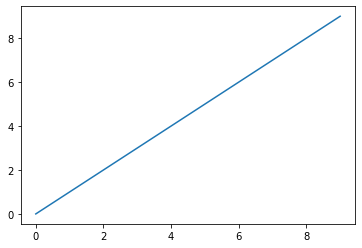

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.plot(np.arange(10))

In [11]:
!pip install --upgrade nbformat

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
